In [2]:
import pandas as pd

In [3]:
path = '../data/figures/C. jacchus 29_05 - observations-580259.csv'

df = pd.read_csv(path)
df

,id,uuid,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,...,place_county_name,place_state_name,place_country_name,place_admin1_name,place_admin2_name,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,9389,fdddd032-d47c-4f41-a98e-3471e0f0be6a,2009-08-19,2009-08-19,NaN,Pacific Time (US & Canada),477,loarie,Scott Loarie,2010-12-19 19:47:24 UTC,...,Rio de Janeiro,Rio de Janeiro,Brazil,Rio de Janeiro,Rio de Janeiro,Common Marmoset,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
1,1352476,d997a140-9672-4580-a71f-6236a0603534,2004-08-10,2004-08-10,NaN,Brasilia,3042,duarte,Duarte Frade,2015-03-31 11:22:30 UTC,...,Rio de Janeiro,Rio de Janeiro,Brazil,Rio de Janeiro,Rio de Janeiro,Sagui-de-Tufos-Brancos,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
2,1451263,eedd0bd3-f11c-46ac-9dce-32c9955cff36,2012-04-30 13:14:59,2012-04-30,2012-04-30 16:14:59 UTC,Brasilia,61934,sandrovonmatter,Sandro Von Matter,2015-05-03 21:15:53 UTC,...,Rio de Janeiro,Rio de Janeiro,Brazil,Rio de Janeiro,Rio de Janeiro,callithrix jacchus,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
3,1451805,38772c55-7d12-437a-9f1e-560096665db0,2014-03-18 11:40:53,2014-03-18,2014-03-18 14:40:53 UTC,Brasilia,61934,sandrovonmatter,Sandro Von Matter,2015-05-03 23:06:03 UTC,...,Itu,São Paulo,Brazil,São Paulo,Itu,Callithrix jacchus,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
4,2653006,7125d1c3-0535-4718-abe7-3c776c854117,2012-07-22 09:23:41,2012-07-22,2012-07-22 12:23:41 UTC,Brasilia,99495,onildo_marini,Onildo João Marini Filho,2016-02-07 10:37:04 UTC,...,Rio de Janeiro,Rio de Janeiro,Brazil,Rio de Janeiro,Rio de Janeiro,Sagui-de-tufos-brancos,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,283009202,a565ccf3-a7b2-406b-b8cc-95384b0decf9,2025/04/05 12:31,2025-04-05,2025-04-05 15:31:00 UTC,Brasilia,800658,mangoverde,William Hull,2025-05-21 23:15:32 UTC,...,Cachoeiras de Macacu,Rio de Janeiro,Brazil,Rio de Janeiro,Cachoeiras de Macacu,Common Marmoset,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
1371,283009204,635cc386-49c1-4e39-967a-bc8c99dd3084,2025/04/05 12:33,2025-04-05,2025-04-05 15:33:00 UTC,Brasilia,800658,mangoverde,William Hull,2025-05-21 23:15:32 UTC,...,Cachoeiras de Macacu,Rio de Janeiro,Brazil,Rio de Janeiro,Cachoeiras de Macacu,Common Marmoset,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
1372,283662531,59261d31-4271-44d9-95fb-c38865382138,2025/05/23 12:49,2025-05-23,2025-05-23 15:49:00 UTC,Brasilia,2726320,alexandremedeiros,Alexandre da Silva Medeiros,2025-05-24 16:06:11 UTC,...,Iperó,São Paulo,Brazil,São Paulo,Iperó,Sagui-de-tufos-brancos,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373
1373,284435123,18e3bd73-e27c-4023-9193-23ad91f1dc6b,2024-12-31 08:42:25,2024-12-31,2024-12-31 11:42:25 UTC,Brasilia,9361630,viajocaminhando,Joanna Pimentel - ViaJô Caminhando,2025-05-27 01:17:43 UTC,...,Cachoeiras de Macacu,Rio de Janeiro,Brazil,Rio de Janeiro,Cachoeiras de Macacu,Sagui-de-tufos-brancos,Callithrix jacchus,Sagui-de-tufos-brancos,Mammalia,43373


In [4]:
df.columns

Index(['id', 'uuid', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'user_id', 'user_login', 'user_name', 'created_at',
       'updated_at', 'quality_grade', 'license', 'url', 'image_url',
       'sound_url', 'tag_list', 'description', 'num_identification_agreements',
       'num_identification_disagreements', 'captive_cultivated',
       'oauth_application_id', 'place_guess', 'latitude', 'longitude',
       'positional_accuracy', 'private_place_guess', 'private_latitude',
       'private_longitude', 'public_positional_accuracy', 'geoprivacy',
       'taxon_geoprivacy', 'coordinates_obscured', 'positioning_method',
       'positioning_device', 'place_town_name', 'place_county_name',
       'place_state_name', 'place_country_name', 'place_admin1_name',
       'place_admin2_name', 'species_guess', 'scientific_name', 'common_name',
       'iconic_taxon_name', 'taxon_id'],
      dtype='object')

In [5]:
df['observed_on'] = pd.to_datetime(df['observed_on'])
df['observed_on']

0      2009-08-19
1      2004-08-10
2      2012-04-30
3      2014-03-18
4      2012-07-22
          ...    
1370   2025-04-05
1371   2025-04-05
1372   2025-05-23
1373   2024-12-31
1374   2023-09-10
Name: observed_on, Length: 1375, dtype: datetime64[ns]

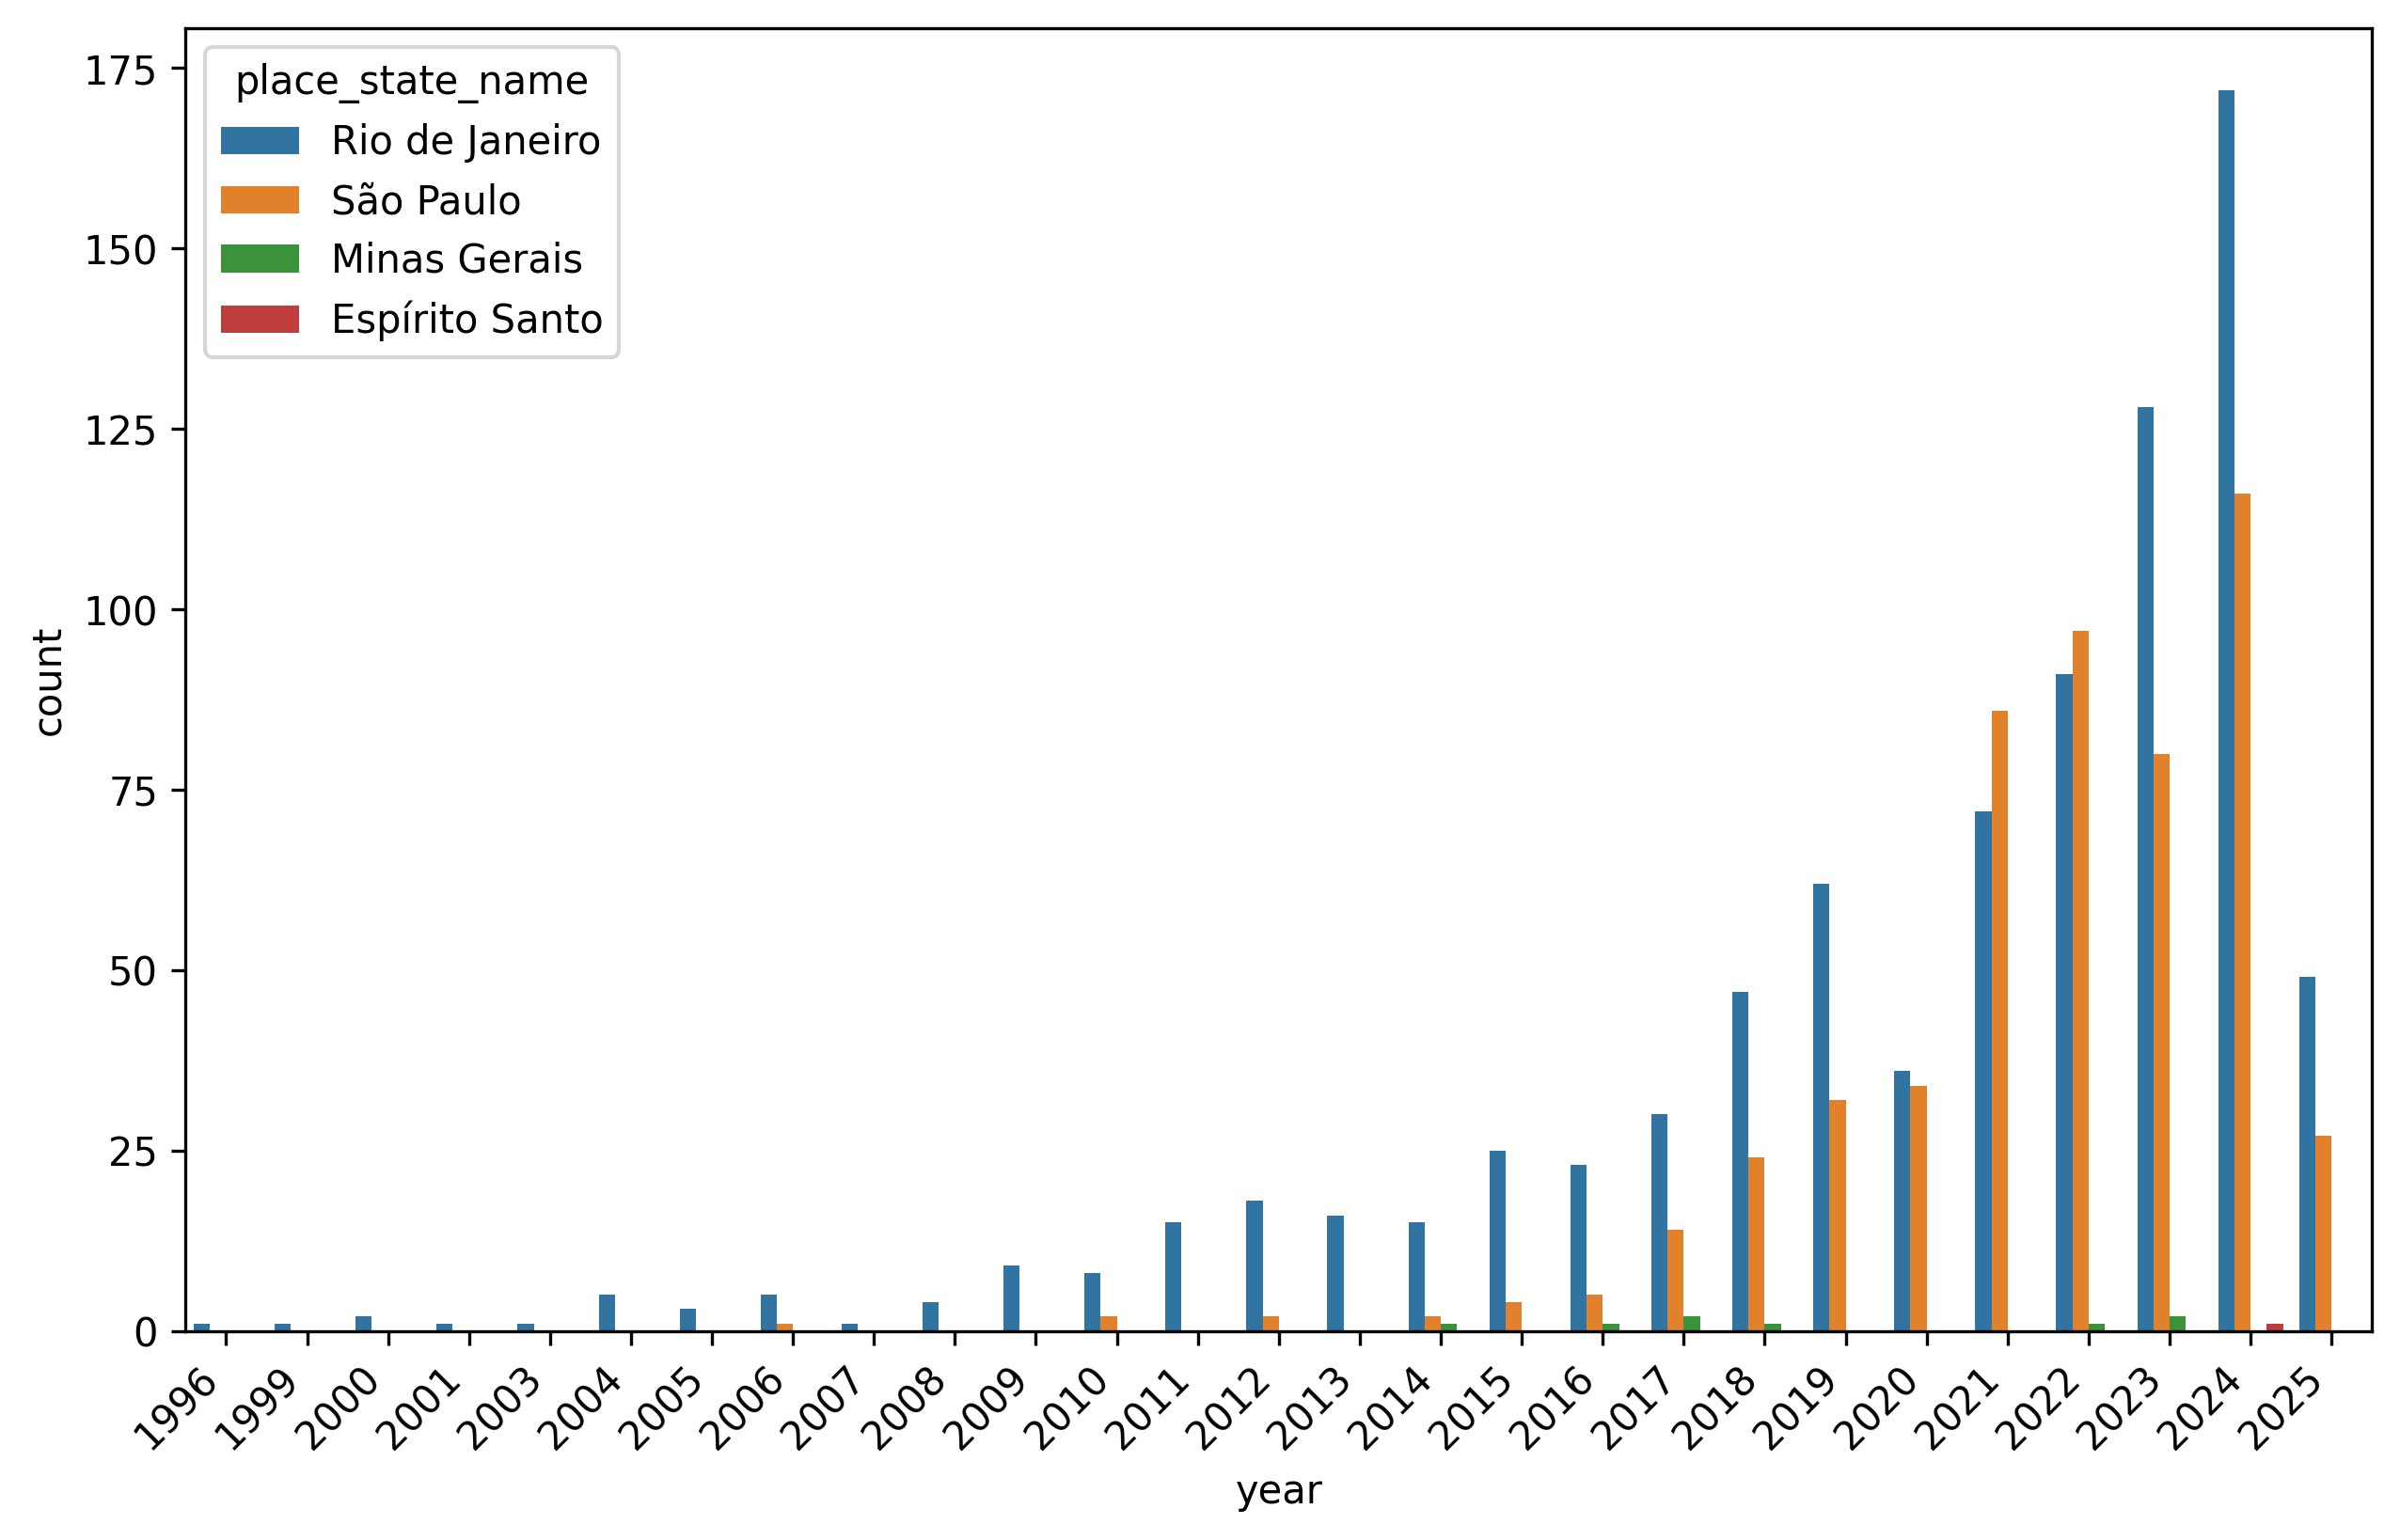

In [21]:
import seaborn as sns

import matplotlib.pyplot as plt

df['year'] = df['observed_on'].dt.year

yearly_counts = df.groupby(['year', 'place_state_name']).size().reset_index(name='count')
yearly_counts.index = pd.to_datetime(yearly_counts['year'], format='%Y')

# Customize dpi and resolution
dpi = 300  # Set your desired dpi
fig = plt.figure(dpi=dpi, figsize=(10, 6))  # Adjust figsize as needed

# Personalize x labels to not showing all years
plt.xticks(rotation=45, ha='right')

sns.barplot(data=yearly_counts, x='year', y='count', hue='place_state_name', errorbar=None)
plt.show()

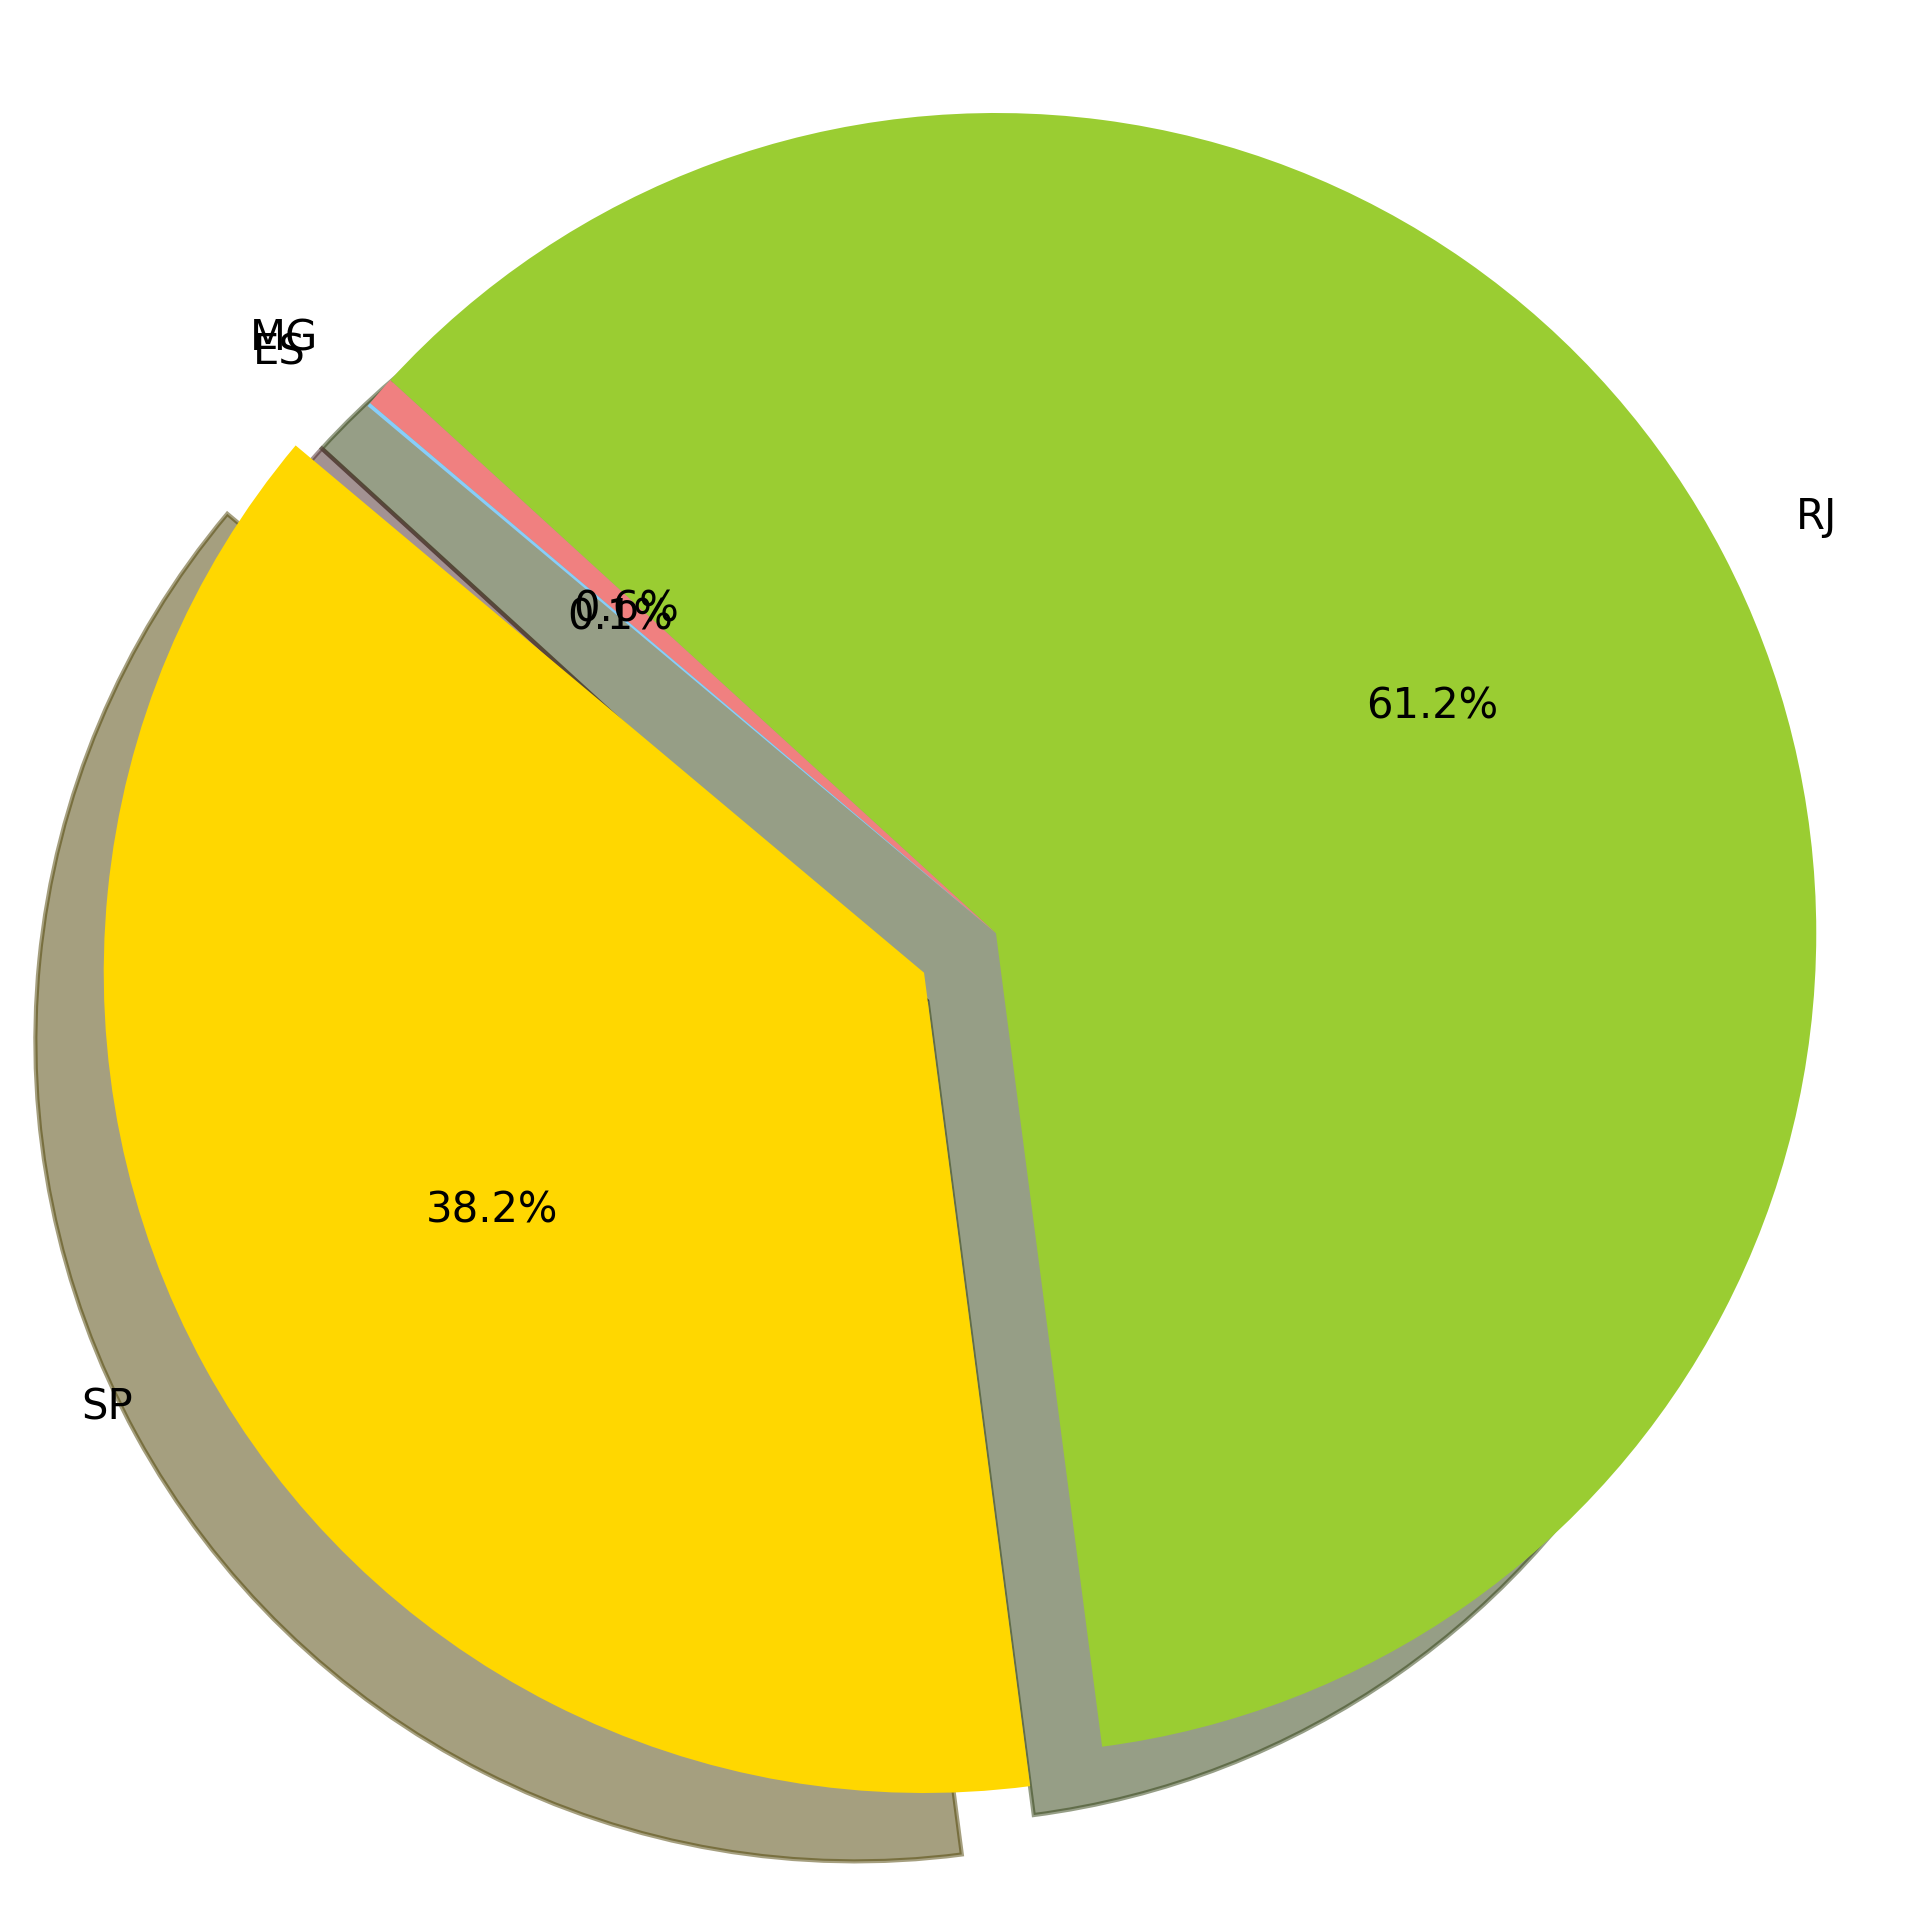

In [2]:
import matplotlib.pyplot as plt

# Data for the pie chart (observations in Southeast Brazil)
labels = ['SP', 'RJ', 'MG', 'ES']
sizes = [515, 825, 8, 1]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice (SP)

# Create the pie chart
plt.figure(figsize=(8, 8), dpi=300)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

#plt.title('Distribuição de Observações no Sudeste do Brasil')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()